In [1]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

# 資料作成に使用する最もフィットするモデルはどれかを示すための表・グラフを作るためのプログラム

cg
ep
lu
all
[57, 13, 3]
      線形モデル   対数モデル  反比例モデル
                           
cg   86.363  13.636   0.000
ep  100.000   0.000   0.000
lu   69.047  23.809   7.142
全体   78.082  17.808   4.109


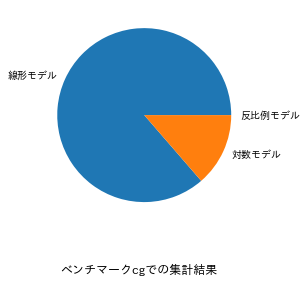

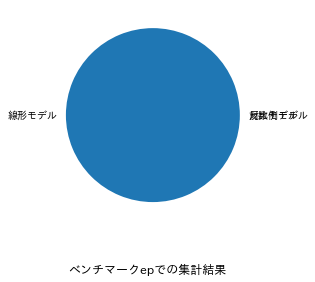

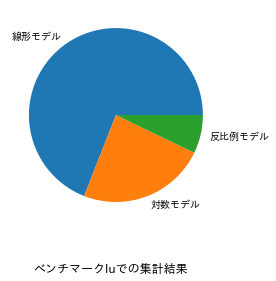

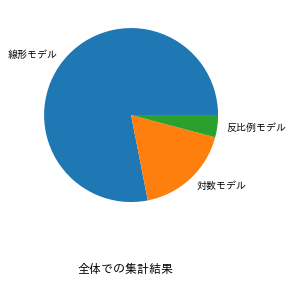

In [2]:
csv_directory_path = './tmp_GenerateResources/'
result_label = ["線形モデル", "対数モデル", "反比例モデル"]
result_of_all = [0, 0, 0]
list_for_csv = []

# 第一引数として渡されたリストの値の合計値に対する割合を算出する。
# 第二引数として渡された文字列を返り値のリストの先頭に入れる。
# 上記2行での処理をまとめたリストを返す関数。
# 要素として入れられる値の小数点以下は切り捨てられる。
def return_ratio_list(target_list, row_name):
    summarised_num = sum(target_list)
    return_list = []
    return_list.append(row_name)
    for num in target_list:
        return_list.append(math.floor(num/summarised_num * 100000)/1000)
    return(return_list)

for benchmark in benchmarks:
    result_of_benchmark = [0, 0, 0]
    file_name = benchmark+'.csv'
    file_path = csv_directory_path+file_name
    if(os.path.isfile(csv_directory_path+file_name) == False):
        continue
    # 完全に値をとれたもののみで集計するようにしている
    if(benchmark != "cg" and benchmark != "ep" and benchmark != "lu"):
        continue
    
    print(benchmark)
    df = pd.read_csv(file_path, index_col=0)
#     print(df)
    columns = df.columns.values
    indices = df.index.values
    for index in indices:
        row = df.loc[index].tolist()
        result_of_benchmark[row.index(min(row))] += 1
        result_of_all[row.index(min(row))] += 1
    plt.figure()
    plt.pie(result_of_benchmark, labels=result_label)
    plt.suptitle("ベンチマーク"+benchmark+"での集計結果", y=-0.01)
    # ベンチマークごとの結果(%)をCSV化用のデータフレームに追加
    list_for_csv.append(return_ratio_list(result_of_benchmark, benchmark))

print("all")
print(result_of_all)
# 全体の結果(%)をCSV化用のデータフレームに追加
list_for_csv.append(return_ratio_list(result_of_all, "全体"))

# 全体での集計結果をまとめた円グラフの出力
plt.figure()
plt.pie(result_of_all, labels=result_label)
plt.suptitle("全体での集計結果", y=-0.01)

# 結果をCSV化するためのDataFrameに関する処理
list_for_csv_df = pd.DataFrame(list_for_csv)
list_for_csv_df.columns = [""] + result_label
list_for_csv_df.set_index("", inplace=True)
## 作成したデータフレームをプリント出力
print(list_for_csv_df)
## 作成したデータフレームをCSVとして保存
list_for_csv_df.to_csv("./tmp_GenerateResources/calced_table.csv")
